# Machine Learning
## Linear Regression




** Machine Learning** 

**Field of study that gives computers the ability to learn without being explicitly programmed** (Arthur Samuel -1959)

**A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.** (Tom Michel 1999)


![Learning](images/learningConcept.jpg)

Application of Machine Learning :
- recognition : face, object, speech, gait, handwritten 
- detection, identification : object, fraud (credit card), spam email, disease
- recommender problems : the most liked movies, products, and etc
- prediction : stock prices, housing
- etc

Learning :
1. Supervised learning
    - learn from the supervisor
    - teach the computer 

2. Unsupervised learning
    - computer learn form the data

## Supervised Learning - Regression

Data set : harga rumah berdasarkan luas/ukuran rumah

![housing](images/housingprices.jpg)

Problem : Berapa harga rumah dengan ukuran luas 1250 

### Regression

bertujuan untuk prediksi atau menghasilkan nilai real (continous value) berdasarkan sejumlah fitur atau atribut

### Linear Regression

yaitu suatu model yang mengasumsikan relasi antara input variabel ($x$) dan output variabel ($y$) adalah linear.  Bentuk model regressi linear adalah sebagai berikut :

\begin{eqnarray}
f:\Re \rightarrow \Re \quad f(x;w)&=&w_0+w_1x \\
f:\Re \rightarrow \Re^d \quad f(x;w)&=&w_0+w_1x_1+...+w_dx_d \\
\end{eqnarray}

$f(x;w)$ atau $y$ adalah output variabel, $x$ adalah input atau fitur atau atribut, dan $w$ adalah parameter atau *coefficients* yang akan dicari dengan menggunakan regressi


$w_0$ secara umum disebut dengan bias atau untuk persamaan linear ini disebut dengan *intercept*

Jika hanya terdapat satu fitur atau satu dimensi atau satu input saja, maka disebut dengan *simple linear regression* atau *univariate regression*.  Model yang dibentuk atau regressi yang dihasilkan disebut dengan *line* atau *plane*.

Jika lebih dari satu dimensi, disebut dengan *multivariate regression*, hasil dari regressi untuk multivariate ini disebut dengan *hyperplane*

### Simple Linear Regression

Prediksi harga rumah, dengan data sebagai berikut :
![housing](images/housingtable.jpg)

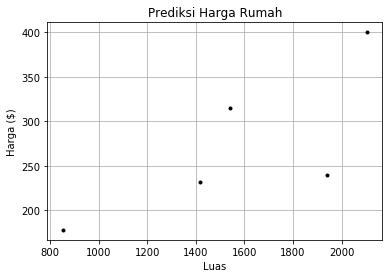

In [1]:
import matplotlib.pyplot as plt
X=[[2104],[1416],[1539],[852],[1940]]
Y=[[400],[232],[315],[178],[240]]

plt.title('Prediksi Harga Rumah')
plt.xlabel('Luas')
plt.ylabel('Harga ($)')
plt.plot(X, Y, 'k.')
plt.grid(True)
plt.show()

Dari data diatas, dapat dilihat bahwa terdapat korelasi **positif** antara luas rumah dengan harga rumah, yaitu, semakin besar luasan rumah, maka harga rumah semakin mahal

### Learning

In [2]:
from sklearn.linear_model import LinearRegression


** Learning **

In [12]:
X=[[2104],[1416],[1539],[852],[1940]]
Y=[[400],[232],[315],[178],[240]]
model = LinearRegression()
model.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** Testing **

In [14]:
model.predict(1250)

array([[ 230.13060588]])

** Parameter Learning **

In [18]:
print(model.coef_)
print(model.intercept_)

[[ 0.13388318]]
[ 62.77663135]


Untuk Simple Linear Regression / Univariate Regression, dimana $y=w_0+w_1x$, maka bias atau intercept, dan koefisien dari input, dapat dihitung dengan menggunakan variance dan covariance dari dataset.

\begin{eqnarray}
var(x)&=&\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n-1}\\
cov(x,y)&=&\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{n-1}\\
\end{eqnarray}

koefisien dan intercept dari model regressi linear adalah :
\begin{eqnarray}
w_1&=&\frac{cov(x,y)}{var(x)}\\
w_0&=&\bar{y}-w_1\bar{x}
\end{eqnarray}


In [27]:
X=[[2104],[1416],[1539],[852],[1940]]
Y=[[400],[232],[315],[178],[240]]

tempX=0
tempY=0
for i in range(len(X)):
    tempX=tempX+X[i][0]
    tempY=tempY+Y[i][0]
meanX=float(tempX/len(X))    
meanY=float(tempY/len(Y))

varX=0
cov=0
for i in range(len(X)):
    varX=varX+(X[i][0]-meanX)**2
    cov=cov+(X[i][0]-meanX)*(Y[i][0]-meanY)
varX=varX/(len(X)-1)
cov=cov/(len(X)-1)

coef=float(cov/varX)
print(coef)
intrcpt=meanY-coef*meanX
print(intrcpt)

0.13388317962523097
62.77663135246232


### Multivariate Linear Regression

yaitu, jika model yang akan dibentuk berdasarkan beberapa fitur atau atribut, $f(x;w)=w_0+w_1x_1+...+w_dx_d$

Pencarian paramater tersebut membutuhkan :
- loss function
- meminimalkan loss function

Loss Function :
\begin{eqnarray}
J_n(w)=\frac{1}{n}\sum_{i=1}^{n}(y_i-f(x_i;w))^2
\end{eqnarray}

### Gradient Descent 

Untuk mencari nilai koefisien dari model yang akan dibentuk, dapat dilakukan dengan cara meminimalkan error dari model yang dihasilkan dari data training, atau yang disebut dengan Gradient Descent.

Tahapan yang dilakukan pada Gradient Descent :
1. Hitung error yang dihasilkan oleh setiap data set (antara output dengan target)
2. Gunakan *learning rate* untuk menentukan seberapa jauh perubahan menuju error minimal
3. Lakukan berulang kali sampai error minimal tercapai

Model regressi linear seperti ini dapat direpresentasikan dengan matriks sebagai berikut :
\begin{eqnarray}
y=
 \begin{bmatrix}
   y_1 \\
   ...\\
   y_n
   \end{bmatrix}
\quad X=  
  \begin{bmatrix}
   1 \quad x_1 \\
   ... \quad...\\
   1 \quad x_n
   \end{bmatrix}
\quad w=  
  \begin{bmatrix}
   w_0 \\
   ...\\
   w_1
   \end{bmatrix}   
\end{eqnarray}

\begin{eqnarray}
\frac{1}{n}\sum_{i=1}^{n}(y_i-f(x;w))^2&=&\frac{1}{n}
\Bigg[\begin{bmatrix}
y_1\\
...\\
y_n
\end{bmatrix}-\begin{bmatrix}
1 \quad x_1\\
...\quad ...\\
1 \quad x_n
\end{bmatrix}
\begin{bmatrix}
w_0\\
...\\
w_1
\end{bmatrix}
\Bigg]^2\\
&=&\frac{1}{n}[y-Xw]^2
\end{eqnarray}

\begin{eqnarray}
\frac{\partial}{\partial w}\frac{1}{n}[y-Xw]^2&=&\frac{2}{n}X^T(y-Xw)\\
&=&\frac{2}{n}(X^Ty-X^TXw)=0\\
w&=&(X^TX)^{-1}X^Ty
\end{eqnarray}


In [6]:
from numpy.linalg import inv
from numpy import dot, transpose

In [9]:
X=[[1,2104],[1,1416],[1,1539],[1,852],[1,1940]]
Y=[[400],[232],[315],[178],[240]]
print (dot(inv(dot(transpose(X), X)), dot(transpose(X), Y)))

[[ 62.77663135]
 [  0.13388318]]


In [1]:
from sklearn import datasets


In [3]:
data=datasets.load_boston()


In [4]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')